In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
#create dataframe to read dataset
df1=pd.read_csv('hr_employee_churn_data.csv')

In [27]:
#check the dataframe and its data
df1.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [28]:
# check the num of rows and columns in dataframe
df1.shape

(14999, 10)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


# Feature Engineering

In [30]:
df2=df1.copy()

In [31]:
df2.drop(['empid'],axis=1,inplace=True)

In [32]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


In [33]:
#handle missing values
df2.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [34]:
df2['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [35]:
df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean(), inplace=True)

In [36]:
df2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [37]:
#handle categorical features..salary using get dummies
# Encode categorical variables like 'salary'
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
label_encoder = LabelEncoder()
df2['salary'] = label_encoder.fit_transform(df2['salary'])
df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean())

0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
         ... 
14994    0.40
14995    0.37
14996    0.37
14997    0.11
14998    0.37
Name: satisfaction_level, Length: 14999, dtype: float64

In [38]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,2,1
2,0.11,0.88,7,272,4,0,0,2,1
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1


# Split Dataset into Training set and Test set

In [40]:
# Split df1 into features (X) and target variable (y)
X = df2.drop('left', axis=1)
y = df2['left']

In [41]:
# Split the df1 into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
len(X_train)

11999

In [43]:
len(X_test)

3000

# Model Selection / Model Building

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


### Standardize features using Standard Scaler

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


### Create a Logistic Regression model

In [46]:
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# prediction
logistic_pred = logistic_model.predict(X_test_scaled)


### Decision Tree 

In [47]:
# Initialize Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier
tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

### Random Forest Classifier

In [49]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

### Gradient Boosting Classifier

In [51]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions
gb_pred = gb_model.predict(X_test_scaled)

### Support Vector Machine (SVM)

In [52]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
svm_pred = svm_model.predict(X_test_scaled)

### Evaluate the models

In [53]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

Logistic Regression Accuracy: 0.755
Decision Tree Accuracy: 0.7646666666666667
Random Forest Accuracy: 0.9876666666666667
Gradient Boosting Accuracy: 0.975
SVM Accuracy: 0.9603333333333334


## Checking data overfit or underfit

In [54]:
# Make predictions on training and test sets
logistic_train_preds = logistic_model.predict(X_train_scaled)
logistic_test_preds = logistic_model.predict(X_test_scaled)

# Calculate accuracy on training and test sets
logistic_train_accuracy = accuracy_score(y_train, logistic_train_preds)
logistic_test_accuracy = accuracy_score(y_test, logistic_test_preds)

# Print accuracy scores
print("\nLogistic Regression:")
print("Training Accuracy:", logistic_train_accuracy)
print("Test Accuracy:", logistic_test_accuracy)



Logistic Regression:
Training Accuracy: 0.7678973247770647
Test Accuracy: 0.755


In [55]:
# Make predictions on training and test sets
tree_train_preds = tree_model.predict(X_train)
tree_test_preds = tree_model.predict(X_test)

# Calculate accuracy on training and test sets
tree_train_accuracy = accuracy_score(y_train, tree_train_preds)
tree_test_accuracy = accuracy_score(y_test, tree_test_preds)

print("Decision Tree:")
print("Training Accuracy:", tree_train_accuracy)
print("Test Accuracy:", tree_test_accuracy)

Decision Tree:
Training Accuracy: 0.7612301025085424
Test Accuracy: 0.7646666666666667


In [56]:
# Make predictions on training and test sets
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

# Calculate accuracy on training and test sets
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)

# Print accuracy scores
print("Random Forest:")
print("Training Accuracy:", rf_train_accuracy)
print("Test Accuracy:", rf_test_accuracy)

Random Forest:
Training Accuracy: 0.9979164930410868
Test Accuracy: 0.997


In [57]:
# Make predictions on training and test sets
gb_train_preds = gb_model.predict(X_train_scaled)
gb_test_preds = gb_model.predict(X_test_scaled)

# Calculate accuracy on training and test sets
gb_train_accuracy = accuracy_score(y_train, gb_train_preds)
gb_test_accuracy = accuracy_score(y_test, gb_test_preds)

# Print accuracy scores
print("\nGradient Boosting:")
print("Training Accuracy:", gb_train_accuracy)
print("Test Accuracy:", gb_test_accuracy)


Gradient Boosting:
Training Accuracy: 0.9777481456788065
Test Accuracy: 0.975


In [58]:
# Make predictions on training and test sets
svm_train_preds = svm_model.predict(X_train_scaled)
svm_test_preds = svm_model.predict(X_test_scaled)

# Calculate accuracy on training and test sets
svm_train_accuracy = accuracy_score(y_train, svm_train_preds)
svm_test_accuracy = accuracy_score(y_test, svm_test_preds)

# Print accuracy scores
print("\nSupport Vector Machine:")
print("Training Accuracy:", svm_train_accuracy)
print("Test Accuracy:", svm_test_accuracy)


Support Vector Machine:
Training Accuracy: 0.9658304858738228
Test Accuracy: 0.9603333333333334


## Confusion matrix

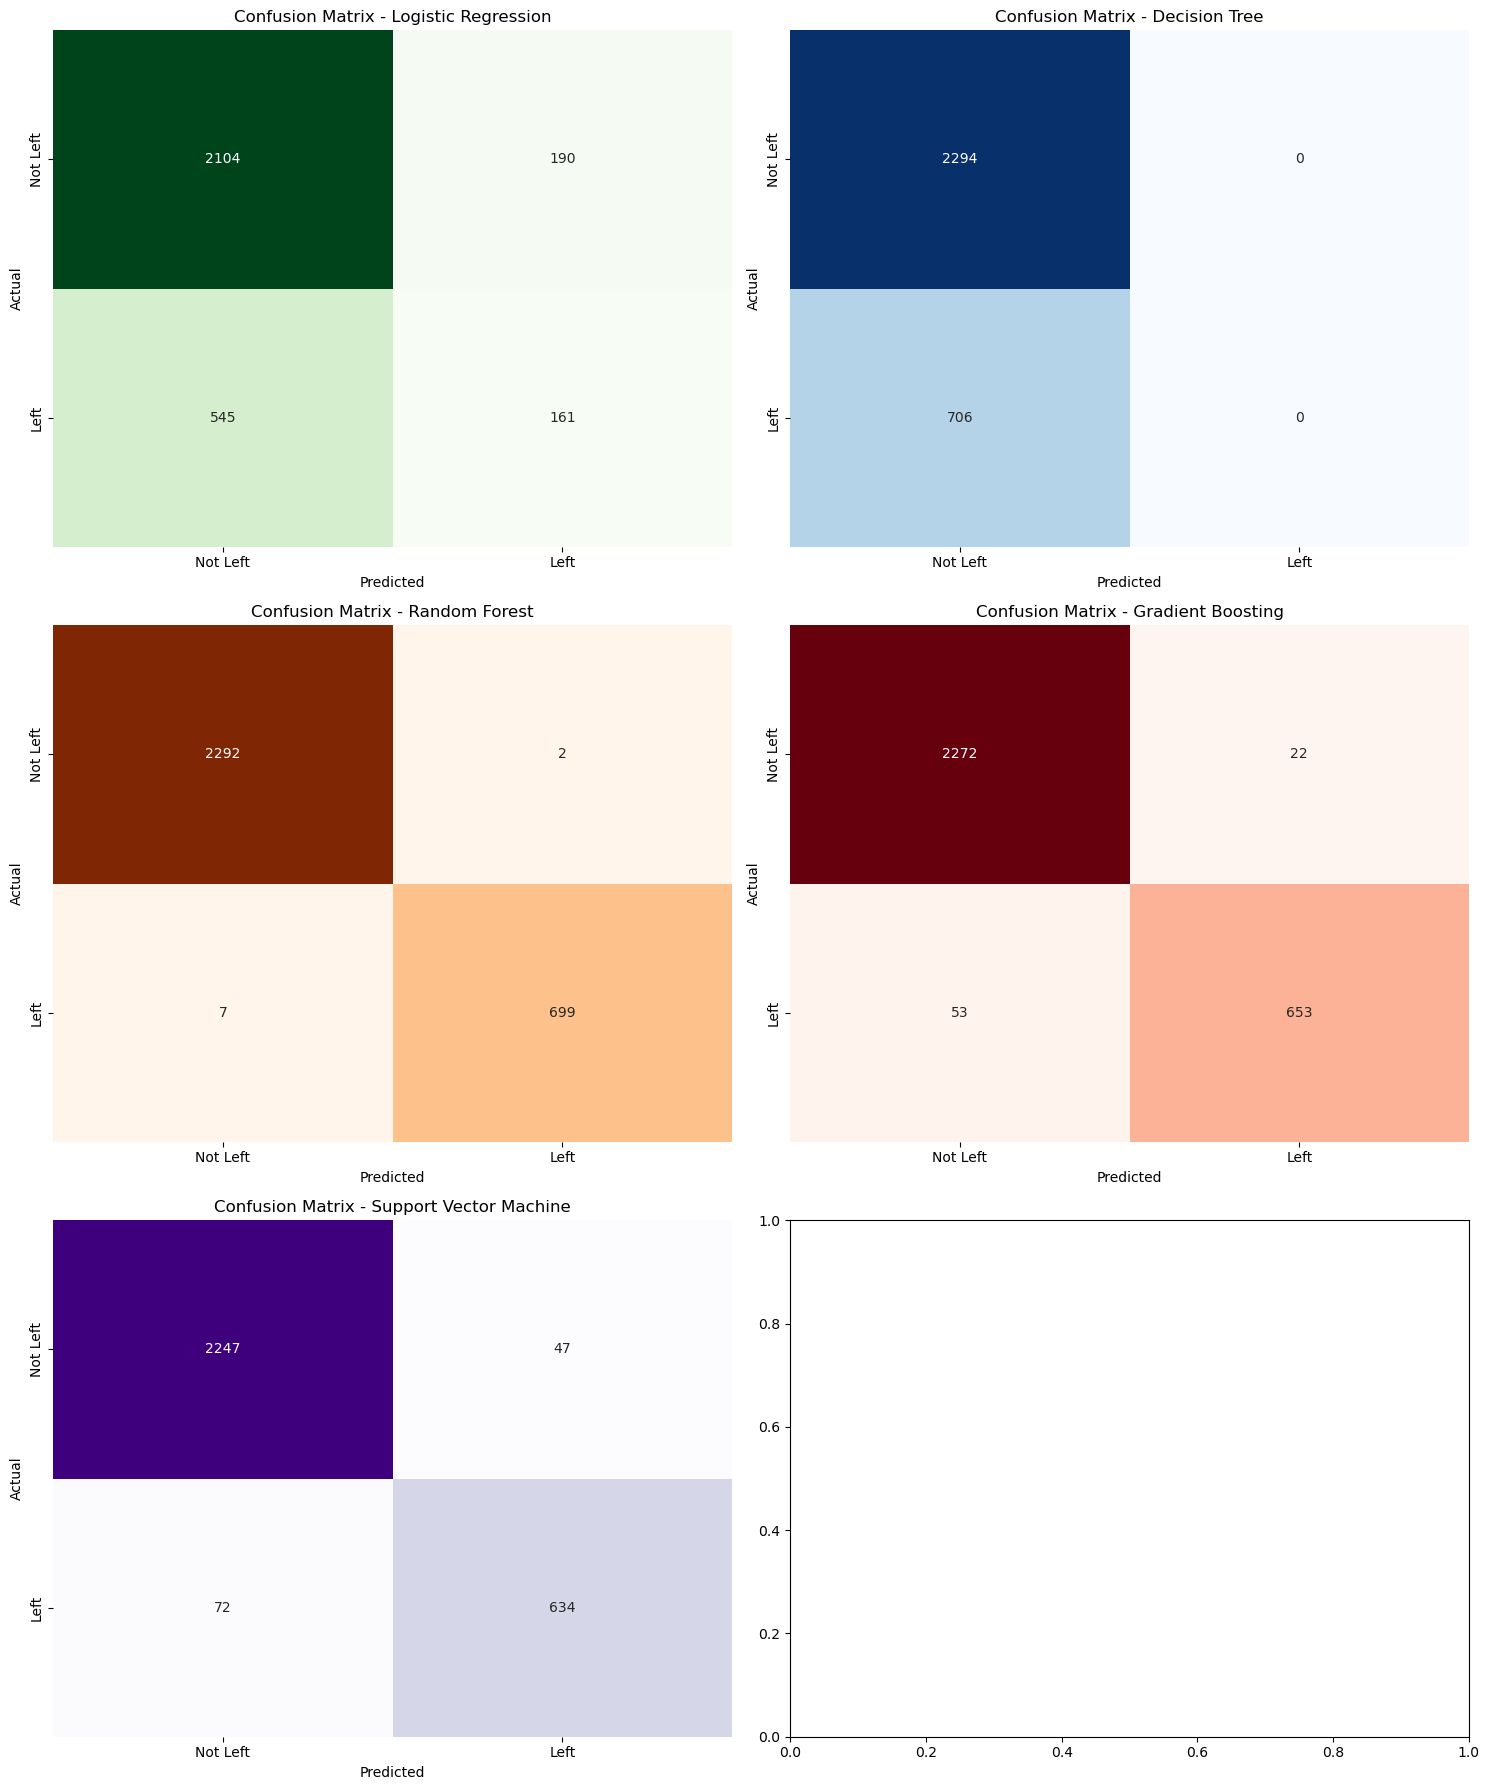

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# List of models and their predictions
models = [logistic_model, tree_model, rf_model, gb_model, svm_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine']
predictions = [logistic_test_preds, tree_test_preds, rf_test_preds, gb_test_preds, svm_test_preds]
colormaps = ['Greens', 'Blues', 'Oranges', 'Reds', 'Purples']  # Different colormaps for each model

# Plot confusion matrix for each model in subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))  # 3 rows, 2 columns

for i, (model, name, pred, cmap) in enumerate(zip(models, model_names, predictions, colormaps)):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', cbar=False, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Confusion Matrix - {name}')
    axes[i//2, i%2].set_xlabel('Predicted')
    axes[i//2, i%2].set_ylabel('Actual')
    axes[i//2, i%2].set_xticks([0.5, 1.5])
    axes[i//2, i%2].set_xticklabels(['Not Left', 'Left'])
    axes[i//2, i%2].set_yticks([0.5, 1.5])
    axes[i//2, i%2].set_yticklabels(['Not Left', 'Left'])

plt.tight_layout()
plt.show()


# ROC Curve

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [61]:
# Calculate probabilities for each model
tree_probs = tree_model.predict_proba(X_test)[:,1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test_scaled)[:, 1]
svm_probs = svm_model.decision_function(X_test_scaled)
logistic_probs = logistic_model.predict_proba(X_test_scaled)[:, 1]

In [62]:
# Calculate ROC curve and AUC for each model
tree_fpr,tree_tpr,_ = roc_curve(y_test, tree_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)

In [63]:
# Calculate AUC scores

tree_auc = roc_auc_score(y_test, tree_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
logistic_auc = roc_auc_score(y_test, logistic_probs)

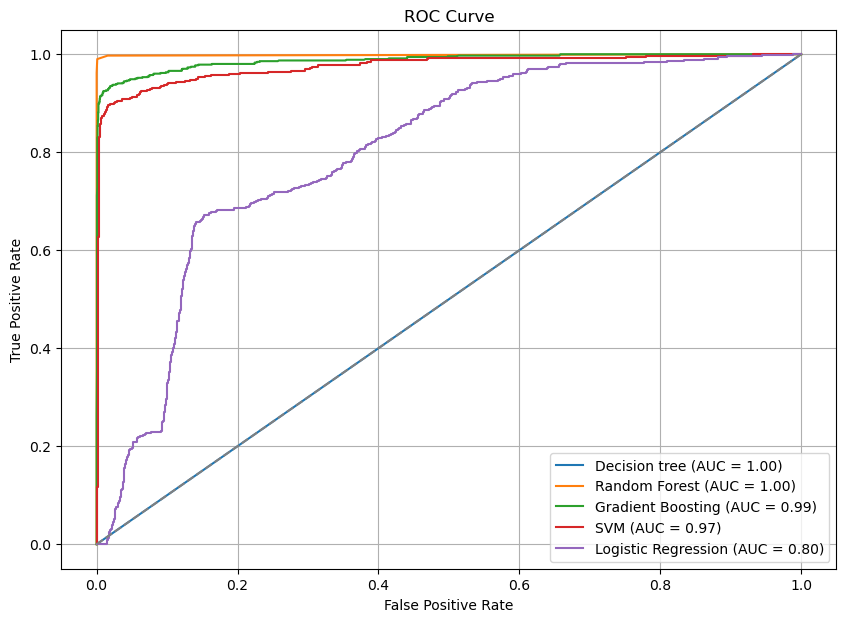

In [64]:
# Plot ROC curves
plt.figure(figsize=(10, 7))

plt.plot(tree_fpr, tree_tpr, linestyle='-', label=f'Decision tree (AUC = {rf_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, linestyle='-', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, linestyle='-', label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, linestyle='-', label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label=f'Logistic Regression (AUC = {logistic_auc:.2f})')

# Plot a random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()